In [ ]:
## CSIS 44620 Web Mining and Applied Natural Language Processing
## homework for Module 7  Final Project for Bonus
## Presented by Ramon Torres
## DEC 7, 2022
## https://github.com/rtmtorresmorales/44620-Module-7-Final-Project

In [29]:
# 1 Code to extract article, orginial article was discarded because text was not available.  
import requests
from bs4 import BeautifulSoup
import pickle
import requests
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

from bs4 import BeautifulSoup
response = requests.get('https://web.archive.org/web/20210326110857/https://hackaday.com/2021/03/23/hey-google-is-my-heart-still-beating/')
print(response.status_code)
print(response.headers['content-type'])
parser = 'html.parser'
soup = BeautifulSoup(response.text, parser)
article_page = requests.get('https://web.archive.org/web/20210326110857/https://hackaday.com/2021/03/23/hey-google-is-my-heart-still-beating/')
article_html = article_page.text

with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

for header in soup.findAll('h1'):
    print('h1 header:', header)
    print('h1 text:', header.text)

200
text/html; charset=UTF-8
h1 header: <h1 class="site-title">
<a href="https://web.archive.org/web/20210326110857/https://hackaday.com/" rel="home">Hackaday</a>
</h1>
h1 text: 
Hackaday

h1 header: <h1 class="entry-title" itemprop="name">Hey Google, Is My Heart Still Beating?</h1>
h1 text: Hey Google, Is My Heart Still Beating?
h1 header: <h1 class="screen-reader-text">Post navigation</h1>
h1 text: Post navigation
h1 header: <h1 class="widget-title">Search</h1>
h1 text: Search
h1 header: <h1 class="widget-title">Never miss a hack</h1>
h1 text: Never miss a hack
h1 header: <h1 class="widget-title">Subscribe</h1>
h1 text: Subscribe
h1 header: <h1 class="widget-title">If you missed it</h1>
h1 text: If you missed it
h1 header: <h1 class="widget-title">Our Columns</h1>
h1 text: Our Columns
h1 header: <h1 class="widget-title">Search</h1>
h1 text: Search
h1 header: <h1 class="widget-title">Never miss a hack</h1>
h1 text: Never miss a hack
h1 header: <h1 class="widget-title">Subscribe</h1>
h

In [44]:
#2  Read and print article and polarity
with open('python-match.pkl', 'rb') as f:
    article_html = pickle.load(f)

parser = 'html.parser'
soup = BeautifulSoup(article_html, parser)
article_element = soup.find('article')
print(article_element.get_text())

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())
#docx = nlp(poem)
print ('Polarity: ', doc._.polarity)
# For added bonus print subjectivity
print ('Subjectivity: ', doc._.subjectivity)




Hey Google, Is My Heart Still Beating?


                17 Comments            

by:
Tom Nardi



March 23, 2021








University of Washington researchers studying the potential medical use of smart speakers such as Amazon’s Echo and Google’s Nest have recently released a paper detailing their experiments with non-contact acoustic heartbeat detection. Thanks to their sensitive microphone arrays, normally used to help localize voice commands from the user, the team proposes these affordable and increasingly popular smart home gadgets could lead a double life as unobtrusive life sign monitors. The paper goes so far as to say that even with multiple people in the room, their technique can be used to monitor the heart and respiratory rate of a specific target individual.
Those are some bold claims, but they aren’t without precedent. Previous studies performed at UW in 2019 demonstrated how smart speaker technology could be used to detect cardiac arrest and monitor infant breathing. T

In [ ]:
# Polarity with .145 shows a timid positive sentiment, subjectivity with .514 is in the middle of author's opinion and a possible factual information.

In [47]:
#3 Load the article text into a trained spaCy pipeline, and determine the 5 most frequent tokens
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print(word_freq.most_common(5))

[('smart', 14), ('paper', 11), ('speaker', 11), ('software', 10), ('speakers', 7)]


In [49]:
#4 Load the article text into a trained spaCy pipeline, and determine the 5 most frequent lemmas
interesting_lemmas = [token.lemma_ for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print(lemma_freq.most_common(5))

[('speaker', 18), ('smart', 14), ('patient', 13), ('paper', 11), ('software', 10)]


In [53]:
#4 Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram
interesting_token = list()
for token, freq in word_freq.most_common(5):
    interesting_token.append(token)

interesting_lemma = set()
for lemma, freq in lemma_freq.most_common(5):
    interesting_lemma.add(lemma)

sentences = list(doc.sents)
stringlist = list()
nmwrds = list()
for sentence in sentences:
    scount = 0
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    stringlist.append(sent_str)
    for token in sentence:
        if not(token.is_space or token.is_punct):
            scount +=1
    nmwrds.append(scount)

def score_sentence_by_token(sentence, interesting_token):
    tcount = 0
    for token in sentences[sentence]:
        if token.text.lower() in interesting_token:
            tcount += 1
    if tcount == 0:
        print('No interesting tokens')
    tscore = tcount/nmwrds[sentence]
    print('sentence:',stringlist[sentence], 'tokens:',tcount,'words:',nmwrds[sentence],'score:',tscore)

def score_sentence_by_lemma(sentence, interesting_lemma):
    lcount = 0
    for token in sentences[1]:
        if token.lemma_.lower() in interesting_lemma:
            lcount += 1
    if lcount == 0:
        print('No interesting lemmas')
    lscore = lcount/nmwrds[sentence]
    print('sentence:',stringlist[sentence], 'lemmas:',lcount,'words:',nmwrds[sentence],'score:',lscore)
    
score_sentence_by_token(1, interesting_token)
score_sentence_by_lemma(1, interesting_lemma)

sentence: Thanks to their sensitive microphone arrays, normally used to help localize voice commands from the user, the team proposes these affordable and increasingly popular smart home gadgets could lead a double life as unobtrusive life sign monitors. tokens: 1 words: 37 score: 0.02702702702702703
sentence: Thanks to their sensitive microphone arrays, normally used to help localize voice commands from the user, the team proposes these affordable and increasingly popular smart home gadgets could lead a double life as unobtrusive life sign monitors. lemmas: 1 words: 37 score: 0.02702702702702703


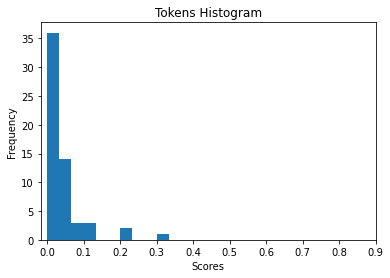

In [58]:
import matplotlib.pyplot as plt
import numpy as np
nmtkns = list()
tscores = list()
for sentence in sentences:
    tcount = 0
    for token in sentence:
        if token.text.lower() in interesting_token:
            tcount +=1
    nmtkns.append(tcount)
for i in nmwrds:
    tscores = [t/w for t,w in zip(nmtkns,nmwrds)]

t = np.array(tscores)  
plt.hist(t)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Tokens Histogram')
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

# Most common range from 0.0 to 0.1

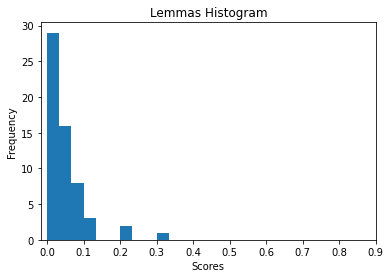

In [59]:
# 6 Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate  titles and axis labels of the scores.


import matplotlib.pyplot as plt
import numpy as np

nmlmas = list()
lscores = list()
for sentence in sentences:
    lcount = 0
    for token in sentence:
        if token.lemma_.lower() in interesting_lemma:
            lcount +=1
    nmlmas.append(lcount)
for i in nmlmas:
    lscores = [t/w for t,w in zip(nmlmas,nmwrds)]

l = np.array(lscores)  
plt.hist(l)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Lemmas Histogram')
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

# Most common range 0.0 to 0.1

In [ ]:
# 7 Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score. Record the scores in this Markdown cell

In [60]:

top_idx_t = np.argsort(x)[-10:]
top_values_t = [t[i] for i in top_idx_t]
print(min(top_values_t))

top_idx_l = np.argsort(x)[-10:]
top_values_l = [l[i] for i in top_idx_l]
print(min(top_values_l))


0.058823529411764705
0.08571428571428572


# Cutoff Score (tokens): 0.058823529411764705
# Cutoff Score (lemmas): 0.08571428571428572

In [69]:
#8 Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (

tsummary = list()
tsumscores = list()

for sentence in sentences:
    tcount = 0
    scount = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            scount += 1
        if token.text.lower() in interesting_token:
            tcount += 1
    if tcount != 0:
        tscore = tcount/scount
        if tscore >= min(top_values_l):
            sent_str = str(sentence).replace('\n','').replace('  ',' ')
            tsummary.append(sent_str)
            tsumscores.append(tscore)

print(' '.join(tsummary))

Previous studies performed at UW in 2019 demonstrated how smart speaker technology could be used to detect cardiac arrest and monitor infant breathing. In fact, the paper explains that standard smart speakers are not particularly well suited to ultrasonic transmission or reception in the first place, as they have naturally been designed to prioritize human speech and music. Ideal placement for the smart speaker. This is obviously at odds with normal smart speaker placement. Unfortunately, despite such promising research, bringing this capability to consumer smart speakers simply isn’t possible right now. Taking The Long Way AroundEven if bureaucratic concerns keep the team’s software off of commercially available smart speakers, the research they’ve conducted is still extremely valuable. If commercial smart speakers aren’t a viable platform for this software, what then? Posted in Engineering, Featured, Interest, Medical Hacks, Original Art, SliderTagged active sonar, medical sensors, m

In [70]:
# 9 Print the polarity score of your summary you generated with the token scores 
doc = nlp(' '.join(tsummary))

print("Token summary polarity: ", doc._.blob.polarity)
print(tsumscores)
print("Token summary sentence count: ", len(tsummary))

Token summary polarity:  0.09747474747474748
[0.08695652173913043, 0.08571428571428572, 0.3333333333333333, 0.2, 0.1111111111111111, 0.10344827586206896, 0.21428571428571427, 0.1]
Token summary sentence count:  8


In [68]:
# 10 Create a summary of the article by going through every sentence in the article 

lsummary = list()
lsumscores = list()

for sentence in sentences:
    lcount = 0
    scount = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            scount += 1
        if token.lemma_.lower() in interesting_lemma:
            lcount += 1
    if lcount != 0:
        lscore = lcount/scount
        if lscore >= min(top_values_l):
            sent_str = str(sentence).replace('\n','').replace('  ',' ')
            lsummary.append(sent_str)
            lsumscores.append(lscore)

print(' '.join(lsummary))


Previous studies performed at UW in 2019 demonstrated how smart speaker technology could be used to detect cardiac arrest and monitor infant breathing. This latest paper could be seen as the culmination of those earlier experiments: a single piece of software that could not just monitor the vitals of nearby patients, but actually detect a medical emergency. In fact, the paper explains that standard smart speakers are not particularly well suited to ultrasonic transmission or reception in the first place, as they have naturally been designed to prioritize human speech and music. For one thing, the smart speaker needs to be aimed at the patient’s chest and placed at a distance of 40 cm to 60 cm (15 in to 23 in). Ideal placement for the smart speaker. This is obviously at odds with normal smart speaker placement. Unfortunately, despite such promising research, bringing this capability to consumer smart speakers simply isn’t possible right now. Taking The Long Way AroundEven if bureaucrati

In [71]:
#11 Print the polarity score of your summary you generated


doc = nlp(' '.join(lsummary))

print("Lemma summary polarity: ", doc._.blob.polarity)
print(lsumscores)
print("Lemma summary sentence count: ", len(lsummary))


Lemma summary polarity:  0.09896214896214899
[0.08695652173913043, 0.08823529411764706, 0.08571428571428572, 0.0967741935483871, 0.3333333333333333, 0.2, 0.1111111111111111, 0.10344827586206896, 0.21428571428571427, 0.1]
Lemma summary sentence count:  10


In [ ]:
#12 Compare your polarity scores of your summaries to the polarity scores of the initial article. Is there a difference? Why do you think that may or may not be?. Answer in this Markdown cell.



# 12 Polarity of tokenes and lemma summaries are less than orginal article,  original articles reached .145 versus lemma and token are in the range of .098 and .097.  Values are so low that may not be significant, but as we reduced the number od sentences and tokenize polarity keep moving to the center values of the actual polarity range between -1 and =+1.


In [ ]:
#13 Based on your reading of the original article, which summary do you think is better (if there's a difference). Why do you think this might be?

#13 The summaries are pretty much the same, perhaps for reserach purposes a more detailed summary will be more beneficial to determine the applicability and usefulness of the article for a researcher.